# Модуль 1

Установим необходимые библиотеки

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from skimpy import skim
import copy
warnings.filterwarnings("ignore")

Загрузим файл Life_expectancy_dataset.csv и посмотрим на набор данных

In [272]:
df_life = pd.read_csv('training_datasets/Life_expectancy_dataset.csv')
df_life.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,"Macau, China",84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


Посмотрим на данные по столбцам

In [97]:
skim(df_life)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 223    │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 6      │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA    ┃ NA %    ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Overall Life    │   133 │   59.64 │   79.73 │   2.495 │  76.1 │  77.62 │  79.45 │  81.47 │  89.5 │  ▇▆▆▂   │  │
│ │ Male Life       │   133 │   59.64 │   77.08 │   2.587 │  71.9 │  74.93 │  76.85 │  79.05 │  85.6 │  ▅▇▇▆▁  │  │
│ │ Female Life     │   133 │   59.64 │   82.51 │   2.582 │  77.8 │  80.53 │  82.65 │   84.1 │  93.5 │  ▅▇▇▁   │  │
│ └─────────────────┴───────┴─────────┴─────────┴─────────┴───────┴────────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA       ┃ NA %         ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Rank                     │        0 │            0 │                         1.3 │                     292 │  │
│ │ Country                  │      132 │        59.19 │                        0.65 │                     146 │  │
│ │ Continent                │      133 │        59.64 │                        0.52 │                     115 │  │
│ └──────────────────────────┴──────────┴──────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Очень много пропусков, что-то не так с данными, посмотрим на последение строки

In [98]:
df_life.tail()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
218,219;Gabon;52.1;51.6;52.5;Africa,NaN,NaN,NaN,NaN,NaN
219,220;Swaziland;51.6;52.2;51;Africa,NaN,NaN,NaN,NaN,NaN
220,221;Afghanistan;51.3;49.9;52.7;Asia,NaN,NaN,NaN,NaN,NaN
221,222;Guinea-Bissau;50.6;48.6;52.7;Africa,NaN,NaN,NaN,NaN,NaN
222,223;Chad;50.2;49;51.3;Africa,NaN,NaN,NaN,NaN,NaN


Данные не распарсены, дораспарсим их вручную

In [273]:
for i in range(90, len(df_life)):
    string = df_life.iloc[i]['Rank'] + str(df_life.iloc[i]['Country'])
    df_life.iloc[i] = int(string.split(';')[0]), str(string.split(';')[1]), float(string.split(';')[2]), float(string.split(';')[3]), float(string.split(';')[4]), str(string.split(';')[5])

Также присутствует столбец Rank, совпадающий с индексом, присвоим индексу столбец Rank

In [274]:
df_life.index = df_life['Rank']
df_life = df_life.drop('Rank', axis = 1)

Посмотрим на данные теперь

In [107]:
skim(df_life)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 223    │ │ float64     │ 3     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Overall Life     │   0 │      0 │   72.49 │   8.459 │   50.2 │   67.45 │   74.9 │   78.6 │  89.5 │ ▂▂▃▇▇▁  │  │
│ │ Male Life        │   0 │      0 │   70.04 │   8.075 │   48.6 │    64.5 │   72.2 │  75.85 │  85.6 │ ▂▂▃▆▇▂  │  │
│ │ Female Life      │   0 │      0 │   75.02 │   8.987 │     51 │   69.75 │   77.9 │   81.6 │  93.5 │  ▂▂▃▇▇  │  │
│ └──────────────────┴─────┴────────┴─────────┴─────────┴────────┴─────────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Country                   │       0 │          0 │                          1.5 │                      324 │  │
│ │ Continent                 │       0 │          0 │                          1.2 │                      271 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Все хорошо, пропусков нет, можно приступать к заданию

Для загруженного датасета рассчитаем среднюю продолжительность жизни для континента Oceania

In [110]:
df_life['Overall Life'][df_life['Continent'] == 'Oceania'].mean()

78.88571428571429

Среди названий стран найдем страны, название которых содержит символы отличные от букв латинского алфавита, точек, запятых и пробелов. Для этих стран рассчитаем разницу между средней продолжительностью жизни женщин и мужчин. Для проверки, есть ли в названии страны лишние символы напишем функцию check_name

In [111]:
def check_name(x):
    for ch in x:
        if not(ch.isalpha() or ch in '., '):
            return False
    return True

In [120]:
df_life['Female Life'][df_life['Country'].apply(check_name) == False] - df_life['Male Life'][df_life['Country'].apply(check_name) == False]

Rank
101    4.4
165    3.2
202    2.4
222    4.1
dtype: float64

Загрузим изображение matrix.png и посмотрим на него

In [133]:
from PIL import Image

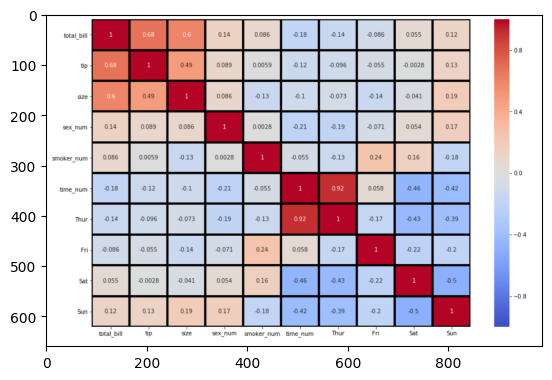

In [151]:
img = np.asarray(Image.open('training_datasets/matrix.png'))
imgplot = plt.imshow(img )

In [185]:
img1 = copy.deepcopy(img)

In [186]:
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        img1[i][j] = [img1[i][j][0]/2, img1[i][j][1]/2, img1[i][j][2]/2]

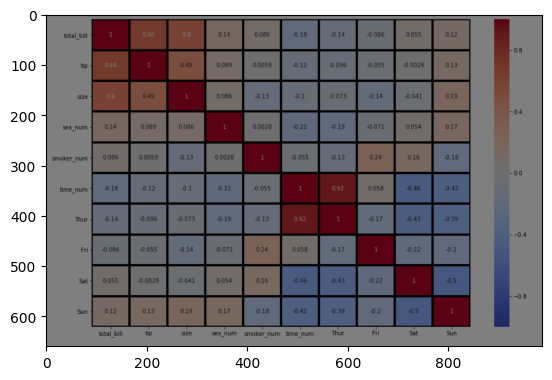

In [187]:
imgplot = plt.imshow(img1)

In [183]:
img1[0]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

Загрузим файл Aristotle.txt 

In [242]:
with open('training_datasets/Aristotle.txt', 'r', encoding="utf-8") as file:
    s = file.readlines()
    

Для загруженного датасета подсчитаем количество строк, содержащих слово «человек» в любом регистре и выведем это число

In [243]:
count_people = 0
for i in range(len(s)):
    s[i] = s[i].lower()
    if 'человек' in s[i]:
        count_people +=1
count_people


886

Для всех строк в данных, подсчитаем, какие три слова (в любом регистре) находятся за словом человек чаще всего. Если слово последнее, будет считать что за ним идет пустая строка. Напишем вспомогательную функцию prepare_word для удаления всех символов кроме букв, чтобы в слова не попали знаки препинания

In [222]:
def prepare_word(word):
    new_word = ''
    for i in range(len(word)):
        if word[i].isalpha():
            new_word += word[i]
    return new_word

Создадим копию файла для будущих заданий

In [251]:
s1 = copy.deepcopy(s)

Теперь составим список слов, встечающихся за словом человек и отсортируем его по возрастанию.

In [237]:
dict = {}
for i in range(len(s)):
    s[i] = s[i].lower()
    if 'человек' in s[i]:
        list_s = s[i].split()
        for x in range(len(list_s)):
            list_s[x] = prepare_word(list_s[x])
        number_prople = 0
        for j in range(len(list_s)):
            if 'человек' in list_s[j]:
                number_prople = j
                break
        try:
            if list_s[number_prople+1] in dict:
                dict[list_s[number_prople+1]] = dict[list_s[number_prople+1]] + 1
            else:
                dict[list_s[number_prople+1]] = 1
        except:
            if "" in dict:
                dict[""] = dict[""] + 1
            else:
                dict[""] = 1
        try:
            if list_s[number_prople+2] in dict:
                dict[list_s[number_prople+2]] = dict[list_s[number_prople+2]] + 1
            else:
                dict[list_s[number_prople+2]] = 1
        except:
            pass
        try:
            if list_s[number_prople+3] in dict:
                dict[list_s[number_prople+3]] = dict[list_s[number_prople+3]] + 1
            else:
                dict[list_s[number_prople+3]] = 1
        except:
            pass
list_after = [sorted(dict.items(), key=lambda dict: dict[1], reverse = True)[i][0] for i in range(len(dict))]
list_after

['',
 'и',
 'не',
 'в',
 'или',
 'а',
 'что',
 'к',
 'который',
 'но',
 'то',
 'он',
 'по',
 'есть',
 'если',
 'как',
 'это',
 'с',
 'о',
 'будет',
 'потому',
 'себе',
 'от',
 'его',
 'человек',
 'сам',
 'бы',
 'делает',
 'бывает',
 'так',
 'может',
 'на',
 'себя',
 'же',
 'во',
 'желает',
 'ради',
 'человека',
 'чем',
 'для',
 'ибо',
 'быть',
 'за',
 'которого',
 'должен',
 'мы',
 'все',
 'ни',
 'известного',
 'склада',
 'ведь',
 'более',
 'нет',
 'имеет',
 'жизнь',
 'чтобы',
 'всетаки',
 'кто',
 'тем',
 'является',
 'поступает',
 'жить',
 'вообще',
 'том',
 'скорее',
 'обладает',
 'самом',
 'дело',
 'тому',
 'только',
 'можно',
 'нужно',
 'счастлив',
 'тогда',
 'причем',
 'когда',
 'легко',
 'при',
 'предмет',
 'страдает',
 'стремится',
 'тот',
 'такие',
 'которому',
 'питают',
 'делается',
 'дружбу',
 'этому',
 'ко',
 'видимо',
 'самому',
 'время',
 'бытие',
 'испытывает',
 'у',
 'того',
 'часто',
 'чтонибудь',
 'их',
 'необходимо',
 'этим',
 'живое',
 'нежели',
 'второе',
 'говорит

Ожидаемо пустых строк больше всего, так как слово часто было в конце строки

Напишем таблицу эмбеддингов, используем вспомогательную функцию prepare_word_with_probel для удаления из строки всех символов кроме букв и пробелов, чтобы в дальнейшем оп пробелам можно было разбить строку на слова

In [240]:
def prepare_word_with_probel(word):
    new_word = ''
    for i in range(len(word)):
        if word[i].isalpha() or word[i] == " ":
            new_word += word[i]
    return new_word

Пройдемся по каждой строке и по каждому слову в строке, записывая слова в словарь как ключ и 1 как значение. Если слово уже встречалось, прибавляем 1 к значению. Выведем получившийся словарь

In [269]:
word_dict = {}
for i in range(len(s1)):
    s1[i] = prepare_word_with_probel(s1[i])
    list_s = s1[i].split(" ")
    for x in range(len(list_s)):
        if list_s[x] in dict:
            word_dict[list_s[x]] = dict[list_s[x]] + 1
        else:
            word_dict[list_s[x]] = 1
word_dict.pop('')
x = sorted(word_dict.items(), key=lambda word_dict: word_dict[1], reverse = True)
word_coder = {}
for i in range(len(word_dict)):
    word_coder[x[i][0]] = i+1
word_coder

{'и': 1,
 'в': 2,
 'что': 3,
 'не': 4,
 'а': 5,
 'как': 6,
 'или': 7,
 'то': 8,
 'же': 9,
 'так': 10,
 'к': 11,
 'если': 12,
 'по': 13,
 'это': 14,
 'с': 15,
 'из': 16,
 'но': 17,
 'для': 18,
 'они': 19,
 'на': 20,
 'о': 21,
 'есть': 22,
 'он': 23,
 'от': 24,
 'мы': 25,
 'будет': 26,
 'все': 27,
 'потому': 28,
 'ведь': 29,
 'быть': 30,
 'ибо': 31,
 'ни': 32,
 'оно': 33,
 'чем': 34,
 'когда': 35,
 'бы': 36,
 'например': 37,
 'у': 38,
 'может': 39,
 'его': 40,
 'кто': 41,
 'того': 42,
 'движение': 43,
 'их': 44,
 'следует': 45,
 'только': 46,
 'тем': 47,
 'время': 48,
 'за': 49,
 'чтобы': 50,
 'себе': 51,
 'при': 52,
 'было': 53,
 'том': 54,
 'образом': 55,
 'люди': 56,
 'во': 57,
 'человек': 58,
 'таким': 59,
 'также': 60,
 'нет': 61,
 'более': 62,
 'именно': 63,
 'них': 64,
 'одно': 65,
 'она': 66,
 'можно': 67,
 'случае': 68,
 'имеет': 69,
 'ради': 70,
 'всегда': 71,
 'друг': 72,
 'этом': 73,
 'которые': 74,
 'вообще': 75,
 'между': 76,
 'удовольствие': 77,
 'себя': 78,
 'всего': 79,


Напишем функцию, которая выдает массив эмбеддингов. В строке удалим все небуквенные символы

In [270]:
def code_text(string):
    string = string.lower()
    string = prepare_word_with_probel(string)
    string = string.split(" ")
    w = []
    for i in range(len(string)):
        w.append(word_coder.get(string[i], 0))
    return w
print(code_text('Росатом - настоящая команда, где ценятся дружба, и каждый свободный работник волен решать, как он будет нести процветание в этот мир'))

[0, 0, 0, 0, 269, 0, 176, 1, 293, 0, 0, 0, 0, 6, 23, 26, 14717, 0, 2, 319, 2081]


Выведем список файлов из папки /Energy_consumption

In [277]:
import os
os.listdir('training_datasets/Energy_consumption')


['AEP_hourly.csv',
 'COMED_hourly.csv',
 'DAYTON_hourly.csv',
 'DEOK_hourly.csv',
 'DOM_hourly.feather',
 'DUQ_hourly.csv',
 'EKPC_hourly.csv',
 'FE_hourly.HDF',
 'NI_hourly.csv',
 'PJME_hourly.csv',
 'PJMW_hourly.csv',
 'pjm_hourly_est.csv',
 'PJM_Load_hourly.json']

Соберем датасет, отдельно обработаем каждый формат, так как их тут несколько, csv, feather, json, HDF

In [321]:
df = ""
for file in os.listdir('training_datasets/Energy_consumption'):
    path = 'training_datasets/Energy_consumption/' + file
    if path[-1] =='v':
        if len(df) == 0:
            df = pd.read_csv(path, index_col = 'Datetime')
        else:
            df1 = pd.read_csv(path, index_col = 'Datetime')
            df = df.merge(df1, left_on='Datetime', right_on='Datetime')
    if path[-1] == 'n':
        df1 = pd.read_json('training_datasets/Energy_consumption/PJM_Load_hourly.json')
        df1 = df1.transpose()
        df1.index = df1['Datetime']
        df1 = df1.drop('Datetime', axis =1)
        #df = df.merge(df1, left_on='Datetime', right_on='Datetime')
df.head()

,PJME_MW,PJMW_MW,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,,,
2002-12-31 01:00:00,26498.0,5077.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26498.0,5077.0,NaN
2002-12-31 02:00:00,25147.0,4939.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25147.0,4939.0,NaN
2002-12-31 03:00:00,24574.0,4885.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24574.0,4885.0,NaN
2002-12-31 04:00:00,24393.0,4857.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24393.0,4857.0,NaN
2002-12-31 05:00:00,24860.0,4930.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24860.0,4930.0,NaN


In [317]:
df = pd.read_json('training_datasets/Energy_consumption/PJM_Load_hourly.json')
df = df.transpose()
df.index = df['Datetime']
df = df.drop('Datetime', axis =1)
df

,PJM_Load_MW
Datetime,
1998-12-31 01:00:00,29309.0
1998-12-31 02:00:00,28236.0
1998-12-31 03:00:00,27692.0
1998-12-31 04:00:00,27596.0
1998-12-31 05:00:00,27888.0
...,...
2001-01-01 20:00:00,35209.0
2001-01-01 21:00:00,34791.0
2001-01-01 22:00:00,33669.0


Как оказалось, в файле json данные идут от 1998 года до 2001, не информативно их добавлять, так как все остальные данные начинаются с 2002 года, поэтому проигнорируем их

Посмотрим на данные по столбцам

In [287]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 143230 │ │ float64     │ 14    │                                                          │
│ │ Number of columns │ 14     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name   ┃ NA       ┃ NA %   ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ PJME_MW       │        0 │      0 │  32110 │   6489 │  14540 │  27590 │  31440 │  35710 │  62010 │  ▁▇▇▂▁  │  │
│ │ PJMW_MW       │        0 │      0 │   5602 │  979.2 │    487 │   4906 │   5530 │   6252 │   9594 │    ▅▇▂  │  │
│ │ AEP           │    21933 │  15.31 │  15500 │   2592 │   9581 │  13630 │  15310 │  17200 │  25700 │  ▂▇▇▃▁  │  │
│ │ COMED         │    76709 │  53.56 │  11420 │   2305 │   7237 │   9778 │  11150 │  12510 │  23750 │  ▅▇▃▁   │  │
│ │ DAYTON        │    21931 │  15.31 │   2038 │  393.5 │    982 │   1749 │   2009 │   2279 │   3746 │  ▁▆▇▃▁  │  │
│ │ DEOK          │    85467 │  59.67 │   3105 │  600.1 │    907 │   2687 │   3013 │   3449 │   5445 │   ▂▇▅▁  │  │
│ │ DOM           │    27017 │  18.86 │  10950 │   2414 │   1253 │   9321 │  10500 │  12380 │  21650 │   ▁▇▅▁  │  │
│ │ DUQ           │    24138 │  16.85 │   1659 │  301.8 │   1014 │   1444 │   1630 │   1819 │   3054 │  ▃▇▅▁   │  │
│ │ EKPC          │    97872 │  68.33 │   1464 │  378.9 │    514 │   1185 │   1386 │   1699 │   3490 │  ▁▇▅▁   │  │
│ │ FE            │    80332 │  56.09 │   7791 │   1332 │      0 │   6805 │   7699 │   8556 │  14030 │    ▅▇▂  │  │
│ │ NI            │    84780 │  59.19 │  11700 │   2371 │   7003 │   9954 │  11520 │  12900 │  23630 │  ▃▇▃▁   │  │
│ │ PJME          │        0 │      0 │  32110 │   6489 │  14540 │  27590 │  31440 │  35710 │  62010 │  ▁▇▇▂▁  │  │
│ │ PJMW          │        0 │      0 │   5602 │  979.2 │    487 │   4906 │   5530 │   6252 │   9594 │    ▅▇▂  │  │
│ │ PJM_Load      │   143230 │    100 │    nan │    nan │    nan │    nan │    nan │    nan │    nan │         │  │
│ └───────────────┴──────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Пропусков очень много, данные каждой компании представлены за разный период, данных по компании PJM_Load нет вобщем, уже нет времени разбираться почему, просто удалим этот столбец

In [325]:
df['Datetime'] = df.index

In [326]:
df.columns

Index(['PJME_MW', 'PJMW_MW', 'AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ',
       'EKPC', 'FE', 'NI', 'PJME', 'PJMW', 'PJM_Load', 'Datetime'],
      dtype='object')

Построем график, на котором будут нарисованы изменения во времени для каждого набора данных, на одном полотне с общими временной и мощностной осями

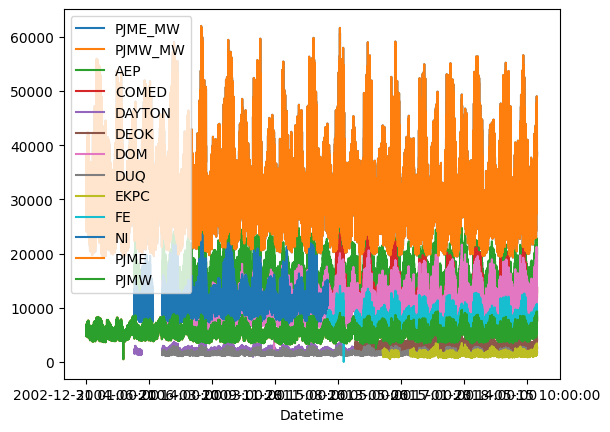

In [327]:
df.plot(x='Datetime', y=['PJME_MW', 'PJMW_MW', 'AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ',
       'EKPC', 'FE', 'NI', 'PJME', 'PJMW'])
plt.show()

# Вывод

В результате выполнени модуля:
 - был обработан файл Life_expectancy_dataset.csv и выполнены необходимые задания
 - загружено изображение matrix.png
 - составлена таблица эмбеддингов Aristotle.txt
 - собран датасет из файлов папки Energy_consumption

In [ ]:
3